My First ML Project


In [5]:
import pandas as pd

df = pd.read_csv('/content/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [6]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [7]:
x = df.drop("logS", axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 9)

In [9]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
672,2.6691,244.294,4.0,0.611111
583,4.6046,266.340,3.0,0.600000
627,8.0480,282.556,17.0,0.000000
1091,-1.0397,180.167,0.0,0.692308
507,4.2434,267.930,0.0,0.714286
...,...,...,...,...
247,1.1853,86.134,0.0,0.000000
855,1.7526,121.183,1.0,0.666667
611,6.7212,390.564,16.0,0.214286
533,0.6930,210.233,0.0,0.000000


In [10]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
784,3.10250,191.455,0.0,0.750000
529,-0.47730,168.152,0.0,0.000000
742,2.29120,204.010,0.0,0.857143
749,1.20550,116.160,2.0,0.000000
1031,2.95952,254.289,0.0,0.631579
...,...,...,...,...
56,4.26930,302.458,0.0,0.000000
501,4.18090,339.218,4.0,0.545455
638,3.81740,270.372,0.0,0.300000
348,0.42840,162.152,1.0,0.833333


In [11]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

y_lr_train_pred

array([-3.61878787e+00, -5.14665895e-01, -3.17202276e+00, -1.40544552e+00,
       -3.86889061e+00, -1.83843693e+00, -3.95361917e-01,  1.83347739e+00,
       -3.96790232e+00, -1.09974833e+00, -1.70860984e-01, -1.44508821e+00,
       -4.07594904e+00, -2.98805252e+00, -2.60150987e+00, -3.89829345e+00,
       -3.82285526e+00, -2.47966196e+00, -3.68405057e+00, -3.95787706e+00,
       -4.61023769e+00, -1.91539692e+00, -1.45290583e+00, -3.03103631e+00,
       -2.33576970e+00, -3.12092787e+00, -1.44367957e+00, -1.47541298e+00,
       -2.13721556e+00, -4.11812618e+00, -4.50659314e+00, -2.34536974e+00,
       -3.98698967e+00, -4.25036243e+00, -2.48444179e+00, -1.97646307e+00,
       -9.46742839e-01, -3.35112002e+00, -3.26080216e+00, -2.81833134e+00,
       -7.69901768e+00, -1.67528799e+00, -2.73902293e+00, -2.55965212e+00,
       -1.35401784e+00, -3.76490014e+00,  3.17309245e-01, -2.60666639e+00,
       -3.49665671e+00, -3.86965532e+00, -3.61878787e+00, -1.80425706e+00,
       -6.03288361e+00, -

In [13]:
#Evaluate Model Performance

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mae = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mae = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [14]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mae, lr_train_r2, lr_test_mae, lr_test_r2]).transpose()

In [15]:
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.009128,0.756002,1.022703,0.80874


In [16]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state =9)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=9)

In [17]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mae = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mae = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [19]:
rf_results = pd.DataFrame(['Linear regression', rf_train_mae, rf_train_r2, rf_test_mae, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.008788,0.756084,1.297267,0.757392


In [21]:
# Model Comparison

df_models = pd.concat([lr_results, rf_results], axis =0)
df_models.reset_index(drop =True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.009128,0.756002,1.022703,0.80874
1,Linear regression,1.008788,0.756084,1.297267,0.757392


Text(0.5, 0, 'Experimental LogS')

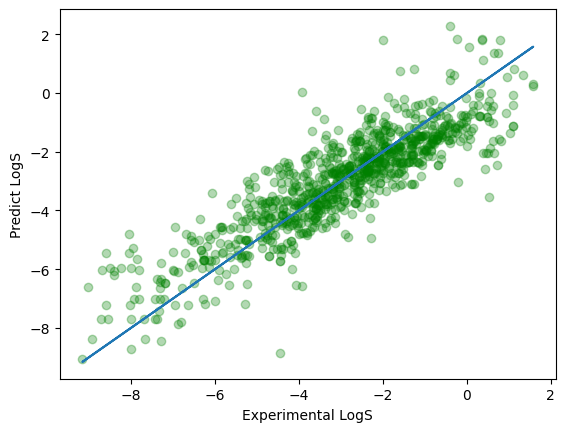

In [28]:
# Data Visualization of Prediction results

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, c ='green', alpha=0.3)
z =np.polyfit(y_train, y_lr_train_pred, 1)


plt.plot(y_train, y_train)
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
